## Notebook made by   (If not filled in correctly: 0 pts for assignment)

__Name(s)__: Robin Spiers & Tom Handgraaf

__Student id(s)__ : 11829494 & 11852615

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )

Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file.

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='https://i.imgur.com/RZVQP9i.jpg'/>

# Recommender systems
LeerDoelen:
1. Hoe omgaan met spreadsheets in pandas?
2. Zelf bouwen van een recommender

Methode:
1. We spelen eerste wat met de data, en bekijken de data.
2. Dan programmeren we onze recommender. 
3. Het programmeren van de correlaties laten we aan een pakket over. Maar als je wilt kan je het zelf ook proberen.
## Inhoud

1. Bekijk de antwoorden op de vragenlijst 
2. Bereken wat gemiddeldes
3. Bereken Pearson corelaties
4. Plot je resultaten
5. Maak een recommender

In [1]:
import requests
import pandas as pd
from io import BytesIO
import math
import numpy as np
%matplotlib inline
import csv
import operator

In [2]:
# Lees de file in

with open('responses.csv') as f:
    r = csv.reader(f, delimiter = ',')
    for row in r:
        print(row)
        print(row[0])
        print(row[0],row[1],row[2],)

['Timestamp', 'Wat is je naam?', 'Wat is je geslacht?', 'Wat is je leeftijd (in jaren)?', '', 'Wiskunde', 'Nederlands', 'Engels', 'Boer zoekt vrouw', 'NOS Journaal', 'Gym', 'Geschiedenis', 'Aardrijkskunde', 'Economie', 'Natuur/Scheikunde', 'Biologie', 'Handvaardigheid', 'De Wereld Draait Door', 'Wie is de mol?', 'Voetbal International', 'The Voice of Holland', 'GTST', 'Geordie Shore', 'Expeditie Robinson', 'Utopia', 'Wat vond je van het college dat je net gekregen hebt?']
Timestamp
Timestamp Wat is je naam? Wat is je geslacht?
['3/23/2015 11:23:05', 'nickskf', 'Man', '24', '', '7', '1', '7', '', '8', '7', '7', '6', '6', '9', '9', '', '', '', '', '', '', '', '', '', 'Interessant en leerzaam. Het heeft meer inzicht gegeven hoe zoekmachines en webshops werken.']
3/23/2015 11:23:05
3/23/2015 11:23:05 nickskf Man
['3/23/2015 11:23:57', 'Merel Stammes', 'Vrouw', '17', '', '8', '7', '5', '7', '7', '6', '9', '', '8', '', '7', '', '9', '10', '2', '5', '7', '6', '9', '3', 'Interessant om te wete

In [3]:
# Alternatief waarin je direct het spreadsheet van Google download

headers = {
    'dnt': '1',
    'accept-encoding': 'gzip, deflate, sdch, br',
    'accept-language': 'nl,en-US;q=0.8,en;q=0.6',
    'x-chrome-uma-enabled': '1',
    'pragma': 'no-cache',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.96 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'cache-control': 'no-cache',
    'authority': 'docs.google.com',
    'referer': 'https://docs.google.com/spreadsheets/d/1P8Prs24AvhARVaJMHF5C5vjuc14aZFFRCXPieo8ENlI/edit?export=csv',
}

params = (
    ('format', 'csv'),
    ('id', '1P8Prs24AvhARVaJMHF5C5vjuc14aZFFRCXPieo8ENlI'),
    ('gid', '354814914'),
)

csv = requests.get('https://docs.google.com/spreadsheets/d/1P8Prs24AvhARVaJMHF5C5vjuc14aZFFRCXPieo8ENlI/export',
                    headers=headers, params=params).content

df = pd.read_csv(BytesIO(csv), index_col="Wat is je naam?")
df.index.name='Persoon'
df= df.iloc[18:]  # just select the rows we want
df

,Timestamp,Wat is je geslacht?,Wat is je leeftijd (in jaren)?,Unnamed: 4,Wiskunde,Nederlands,Engels,Boer zoekt vrouw,NOS Journaal,Gym,...,Handvaardigheid,De Wereld Draait Door,Wie is de mol?,Voetbal International,The Voice of Holland,GTST,Geordie Shore,Expeditie Robinson,Utopia,Wat vond je van het college dat je net gekregen hebt?
Persoon,,,,,,,,,,,,,,,,,,,,,
Jesse van der Sar,5/1/2015 20:28:03,Man,18,NaN,7.0,3.0,5.0,7.0,8.0,7.0,...,NaN,9.0,6.0,4.0,1.0,NaN,NaN,6.0,3.0,NaN
Laura,5/3/2015 17:03:57,Vrouw,19 jaar,NaN,6.0,8.0,8.0,5.0,7.0,9.0,...,6.0,7.0,4.0,4.0,8.0,5.0,6.0,6.0,3.0,Geweldig
Emil,5/4/2015 12:36:56,Man,19,NaN,3.0,3.0,7.0,NaN,7.0,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
Joost Verkaik,5/4/2015 14:22:01,Man,22,NaN,5.0,7.0,9.0,5.0,7.0,7.0,...,5.0,9.0,10.0,6.0,5.0,NaN,5.0,NaN,NaN,NaN
Sivan,5/4/2015 16:01:34,Man,19,NaN,6.0,5.0,5.0,0.0,8.0,7.0,...,7.0,6.0,1.0,4.0,4.0,0.0,0.0,1.0,0.0,NaN
Luca,5/4/2015 17:02:51,Vrouw,19,NaN,7.0,5.0,5.0,8.0,8.0,4.0,...,9.0,7.0,5.0,1.0,2.0,1.0,7.0,2.0,1.0,NaN
Siyen,5/5/2015 11:41:42,Man,23,NaN,8.0,6.0,7.0,10.0,7.0,10.0,...,9.0,8.0,8.0,6.0,7.0,1.0,1.0,8.0,5.0,NaN
Carmen,5/5/2015 14:16:58,Vrouw,21,NaN,7.0,7.0,5.0,5.0,8.0,8.0,...,NaN,7.0,10.0,6.0,6.0,6.0,6.0,8.0,6.0,NaN
Brandon,5/5/2015 15:19:26,Man,20,NaN,6.0,5.0,8.0,NaN,8.0,6.0,...,4.0,8.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop rows with duplicate index
print(len(df))
df['index'] = df.index
df.drop_duplicates(subset = 'index', inplace=True) 
df.drop('index', axis = 1, inplace = True)
print(len(df))

284
264


In [5]:
df.tail(5)

,Timestamp,Wat is je geslacht?,Wat is je leeftijd (in jaren)?,Unnamed: 4,Wiskunde,Nederlands,Engels,Boer zoekt vrouw,NOS Journaal,Gym,...,Handvaardigheid,De Wereld Draait Door,Wie is de mol?,Voetbal International,The Voice of Holland,GTST,Geordie Shore,Expeditie Robinson,Utopia,Wat vond je van het college dat je net gekregen hebt?
Persoon,,,,,,,,,,,,,,,,,,,,,
Nigel,5/17/2018 12:18:25,Man,19,NaN,7.0,6.0,8.0,NaN,7.0,8.0,...,NaN,7.0,6.0,8.0,5.0,5.0,8.0,NaN,NaN,Geweldig
Timon Brouwer,5/17/2018 12:18:33,Man,19,NaN,7.0,4.0,9.0,NaN,8.0,8.0,...,0.0,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Cool man
Mark,5/17/2018 12:18:36,Man,19,NaN,7.0,5.0,6.0,0.0,9.0,7.0,...,1.0,8.0,10.0,9.0,5.0,0.0,0.0,7.0,0.0,Interessant
Stefan van Dompselaar,5/17/2018 13:15:50,Man,20,NaN,3.0,6.0,8.0,1.0,7.0,10.0,...,NaN,5.0,5.0,5.0,5.0,2.0,5.0,5.0,1.0,Prima
Anne-Claire,5/17/2018 14:56:43,Vrouw,21,NaN,3.0,7.0,10.0,2.0,8.0,8.0,...,6.0,7.0,7.0,0.0,8.0,1.0,4.0,6.0,0.0,Goed


In [6]:
df.describe()

,Unnamed: 4,Wiskunde,Nederlands,Engels,Boer zoekt vrouw,NOS Journaal,Gym,Geschiedenis,Aardrijkskunde,Economie,...,Biologie,Handvaardigheid,De Wereld Draait Door,Wie is de mol?,Voetbal International,The Voice of Holland,GTST,Geordie Shore,Expeditie Robinson,Utopia
count,0.0,255.000000,254.000000,255.000000,179.000000,250.000000,249.000000,216.000000,193.000000,225.000000,...,180.000000,170.000000,222.000000,197.000000,179.000000,207.000000,169.000000,186.000000,188.000000,156.000000
mean,NaN,6.905882,5.893701,7.188235,4.519553,6.792000,7.421687,6.583333,5.979275,6.493333,...,5.977778,6.058824,6.563063,6.532995,5.173184,4.724638,2.443787,4.811828,5.574468,2.564103
std,NaN,1.495059,1.590647,1.568595,2.882221,1.641803,2.062260,2.107020,2.186508,1.680030,...,2.276809,2.564449,2.069622,2.758138,3.029473,2.486180,2.400045,3.188166,2.803700,2.622925
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6.000000,5.000000,6.000000,2.000000,6.000000,7.000000,6.000000,5.000000,6.000000,...,5.000000,5.000000,6.000000,5.000000,2.500000,3.000000,0.000000,1.250000,4.000000,0.000000
50%,NaN,7.000000,6.000000,7.000000,5.000000,7.000000,8.000000,7.000000,6.000000,7.000000,...,6.000000,7.000000,7.000000,7.000000,6.000000,5.000000,2.000000,5.500000,6.000000,2.000000
75%,NaN,8.000000,7.000000,8.000000,7.000000,8.000000,9.000000,8.000000,7.000000,7.000000,...,7.250000,8.000000,8.000000,8.000000,7.000000,7.000000,4.000000,7.000000,8.000000,5.000000
max,NaN,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Gemiddelde score per TV programma of per vak.


In [7]:
df['Wiskunde'].mean()

6.9058823529411768

In [8]:
# generaliseren
#vakken = ['Wiskunde','Nederlands','Engels']
vakken = df.columns[4:7] | df.columns[9:16]  # Ik wil alleen die kolommen zien
print(vakken) 
vakdf = df[vakken]
vakdf.head(5)

Index(['Aardrijkskunde', 'Biologie', 'Economie', 'Engels', 'Geschiedenis',
       'Gym', 'Handvaardigheid', 'Natuur/Scheikunde', 'Nederlands',
       'Wiskunde'],
      dtype='object')


,Aardrijkskunde,Biologie,Economie,Engels,Geschiedenis,Gym,Handvaardigheid,Natuur/Scheikunde,Nederlands,Wiskunde
Persoon,,,,,,,,,,
Jesse van der Sar,NaN,NaN,8.0,5.0,NaN,7.0,NaN,7.0,3.0,7.0
Laura,8.0,NaN,7.0,8.0,7.0,9.0,6.0,NaN,8.0,6.0
Emil,6.0,NaN,5.0,7.0,7.0,NaN,NaN,NaN,3.0,3.0
Joost Verkaik,6.0,NaN,7.0,9.0,6.0,7.0,5.0,NaN,7.0,5.0
Sivan,7.0,NaN,7.0,5.0,8.0,7.0,7.0,NaN,5.0,6.0


In [9]:
vakmean = vakdf.mean() 
vakmean.sort_values(ascending=False, inplace=True)
vakmean

Gym                  7.421687
Engels               7.188235
Wiskunde             6.905882
Geschiedenis         6.583333
Economie             6.493333
Handvaardigheid      6.058824
Natuur/Scheikunde    6.044444
Aardrijkskunde       5.979275
Biologie             5.977778
Nederlands           5.893701
dtype: float64

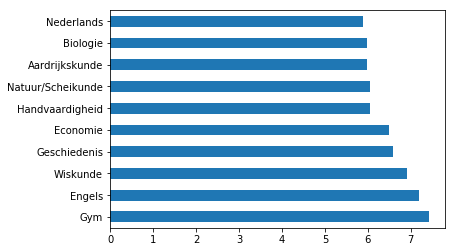

In [10]:
vakmean.plot(kind='barh');

# Gemiddelde score per persoon

## Probleem: 
* gemiddelde wordt per kolom uitgerekend

## Oplossing
1. gebruik het `axis` attribute van `mean`
1. transpose de tabel

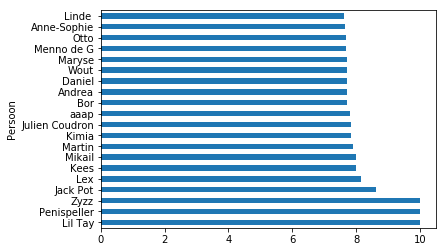

In [11]:
vakmeanPP = vakdf.mean(axis=1) 
vakmeanPP.sort_values(ascending=False, inplace=True)
vakmeanPP.head(20).plot(kind='barh')

In [12]:
omgekeerd=df[vakken].transpose()
omgekeerd

Persoon,Jesse van der Sar,Laura,Emil,Joost Verkaik,Sivan,Luca,Siyen,Carmen,Brandon,Andreas,...,Jo,Madeleine,Toyboy0252,Gijs,Stijn,Nigel,Timon Brouwer,Mark,Stefan van Dompselaar,Anne-Claire
Aardrijkskunde,NaN,8.0,6.0,6.0,7.0,3.0,6.0,NaN,NaN,NaN,...,NaN,3.0,NaN,5.0,4.0,4.0,8.0,9.0,8.0,8.0
Biologie,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,...,NaN,4.0,NaN,7.0,6.0,6.0,2.0,3.0,NaN,7.0
Economie,8.0,7.0,5.0,7.0,7.0,NaN,7.0,NaN,5.0,8.0,...,NaN,6.0,NaN,7.0,6.0,6.0,8.0,8.0,5.0,5.0
Engels,5.0,8.0,7.0,9.0,5.0,5.0,7.0,5.0,8.0,7.0,...,8.0,7.0,NaN,6.0,7.0,8.0,9.0,6.0,8.0,10.0
Geschiedenis,NaN,7.0,7.0,6.0,8.0,NaN,6.0,NaN,7.0,10.0,...,7.0,3.0,NaN,5.0,2.0,2.0,9.0,8.0,8.0,8.0
Gym,7.0,9.0,NaN,7.0,7.0,4.0,10.0,8.0,6.0,4.0,...,0.0,6.0,NaN,7.0,10.0,8.0,8.0,7.0,10.0,8.0
Handvaardigheid,NaN,6.0,NaN,5.0,7.0,9.0,9.0,NaN,4.0,NaN,...,NaN,5.0,NaN,3.0,3.0,NaN,0.0,1.0,NaN,6.0
Natuur/Scheikunde,7.0,NaN,NaN,NaN,NaN,8.0,7.0,6.0,NaN,NaN,...,5.0,7.0,NaN,5.0,7.0,7.0,6.0,5.0,NaN,5.0
Nederlands,3.0,8.0,3.0,7.0,5.0,5.0,6.0,7.0,5.0,7.0,...,8.0,7.0,NaN,6.0,5.0,6.0,4.0,5.0,6.0,7.0
Wiskunde,7.0,6.0,3.0,5.0,6.0,7.0,8.0,7.0,6.0,6.0,...,7.0,8.0,NaN,8.0,7.0,7.0,7.0,7.0,3.0,3.0


In [13]:
omgekeerd.mean()

Persoon
Jesse van der Sar         6.166667
Laura                     7.375000
Emil                      5.166667
Joost Verkaik             6.500000
Sivan                     6.500000
Luca                      5.857143
Siyen                     7.300000
Carmen                    6.666667
Brandon                   5.857143
Andreas                   7.000000
Arnout                         NaN
Bas                       6.800000
Alissa                    7.200000
Anh Nguyen                     NaN
Barend van Rooij          5.000000
Peter                     5.800000
Jeffrey Groefsema         7.142857
Martijn Muller            7.250000
D                         6.833333
Quinten Damen             6.500000
Robin Schouten            7.000000
Marek                     6.333333
Maryse                    7.714286
Anna                      6.800000
Fleur                     6.700000
axel v                    6.100000
Mitchell Kuin                  NaN
Tom                       7.285714
Martijn     

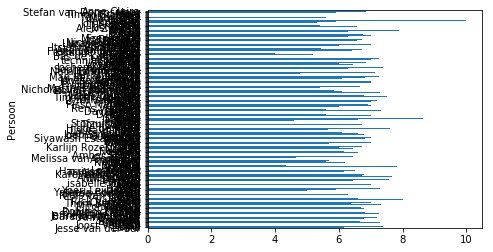

In [14]:
omgekeerd.mean().plot(kind='barh');

# Pearson correlaties



2. Met een voorgedefinieerde functie in Pandas
1. Zelf doen

## Met een voorgedefinieerde functie in Pandas

In [15]:
# Met Pandas http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

vak_df= df[vakken]
vak_df

,Aardrijkskunde,Biologie,Economie,Engels,Geschiedenis,Gym,Handvaardigheid,Natuur/Scheikunde,Nederlands,Wiskunde
Persoon,,,,,,,,,,
Jesse van der Sar,NaN,NaN,8.0,5.0,NaN,7.0,NaN,7.0,3.0,7.0
Laura,8.0,NaN,7.0,8.0,7.0,9.0,6.0,NaN,8.0,6.0
Emil,6.0,NaN,5.0,7.0,7.0,NaN,NaN,NaN,3.0,3.0
Joost Verkaik,6.0,NaN,7.0,9.0,6.0,7.0,5.0,NaN,7.0,5.0
Sivan,7.0,NaN,7.0,5.0,8.0,7.0,7.0,NaN,5.0,6.0
Luca,3.0,NaN,NaN,5.0,NaN,4.0,9.0,8.0,5.0,7.0
Siyen,6.0,7.0,7.0,7.0,6.0,10.0,9.0,7.0,6.0,8.0
Carmen,NaN,7.0,NaN,5.0,NaN,8.0,NaN,6.0,7.0,7.0
Brandon,NaN,NaN,5.0,8.0,7.0,6.0,4.0,NaN,5.0,6.0


## Met een voorgedefinieerde functie in Pandas

In [16]:
# Nu voor de hele matrix.
# We willen de correlaties tussen de mensen: maar corr berekent correlaties tussen kolommen, dus even omdraaien
person_corr_matrix = df[vakken].transpose().corr()
person_corr_matrix

Persoon,Jesse van der Sar,Laura,Emil,Joost Verkaik,Sivan,Luca,Siyen,Carmen,Brandon,Andreas,...,Jo,Madeleine,Toyboy0252,Gijs,Stijn,Nigel,Timon Brouwer,Mark,Stefan van Dompselaar,Anne-Claire
Persoon,,,,,,,,,,,,,,,,,,,,,
Jesse van der Sar,1.000000,-0.328897,0.117760,-0.353553,0.875000,0.408248,0.514004,0.196116,-0.102062,-0.164845,...,-0.598671,-0.265465,NaN,0.363749,4.559833e-01,0.121867,0.548400,0.690035,-0.138794,-0.493480
Laura,-0.328897,1.000000,0.355995,0.668648,-0.188982,-0.866230,-0.011180,0.157895,0.365864,-0.476731,...,-0.581918,-0.063813,NaN,0.206023,4.991366e-01,0.278121,0.437940,0.369861,0.844483,0.706957
Emil,0.117760,0.355995,1.000000,0.425496,0.420021,-0.594089,-0.355995,-1.000000,0.766965,0.659380,...,0.000000,-0.639130,NaN,-0.668214,-4.025025e-01,-0.377088,0.844819,0.431967,0.826727,0.753513
Joost Verkaik,-0.353553,0.668648,0.425496,1.000000,-0.510310,-0.517054,-0.181131,-0.648886,0.582699,-0.075235,...,0.049703,0.265858,NaN,0.245955,4.256283e-01,0.467677,0.473029,0.196116,0.438286,0.679689
Sivan,0.875000,-0.188982,0.420021,-0.510310,1.000000,0.046915,0.133103,0.760886,-0.171707,0.330289,...,-0.452331,-0.759753,NaN,-0.301232,-3.649002e-01,-0.641508,0.107285,0.240192,0.278164,-0.092494
Luca,0.408248,-0.866230,-0.594089,-0.517054,0.046915,1.000000,0.280061,-0.320256,-0.589925,0.374634,...,0.298719,0.369197,NaN,-0.392681,-2.551662e-01,0.404304,-0.684412,-0.799819,-0.828177,-0.640393
Siyen,0.514004,-0.011180,-0.355995,-0.181131,0.133103,0.280061,1.000000,0.561951,-0.280976,-0.863475,...,-0.853639,0.289948,NaN,0.074525,5.354276e-01,0.661112,-0.221899,-0.326267,0.201564,-0.170066
Carmen,0.196116,0.157895,-1.000000,-0.648886,0.760886,-0.320256,0.561951,1.000000,-0.789474,-0.749269,...,-0.639227,-0.280976,NaN,0.553912,3.471825e-01,-0.216506,-0.297044,0.127688,0.066535,-0.293151
Brandon,-0.102062,0.365864,0.766965,0.582699,-0.171707,-0.589925,-0.280976,-0.789474,1.000000,0.171080,...,0.193973,0.000000,NaN,0.303488,2.171053e-01,-0.012794,0.802242,0.556396,0.432825,0.580020


In [17]:
# correlaties tussen de vakken
vak_corr_matrix = df[vakken].corr()
vak_corr_matrix

,Aardrijkskunde,Biologie,Economie,Engels,Geschiedenis,Gym,Handvaardigheid,Natuur/Scheikunde,Nederlands,Wiskunde
Aardrijkskunde,1.000000,0.049358,0.485737,0.125629,0.460139,0.177874,0.241356,0.106189,0.265054,0.042435
Biologie,0.049358,1.000000,-0.062740,0.275299,0.015818,-0.109448,0.371937,0.632217,0.088969,0.041624
Economie,0.485737,-0.062740,1.000000,0.049026,0.327186,0.091037,0.036718,0.085526,0.199115,0.164159
Engels,0.125629,0.275299,0.049026,1.000000,0.200762,0.027438,0.140403,0.019949,0.373294,-0.037743
Geschiedenis,0.460139,0.015818,0.327186,0.200762,1.000000,0.063072,0.235061,-0.049647,0.215663,-0.010920
Gym,0.177874,-0.109448,0.091037,0.027438,0.063072,1.000000,-0.052563,0.031385,0.017733,0.054993
Handvaardigheid,0.241356,0.371937,0.036718,0.140403,0.235061,-0.052563,1.000000,0.154866,0.144277,0.211074
Natuur/Scheikunde,0.106189,0.632217,0.085526,0.019949,-0.049647,0.031385,0.154866,1.000000,0.056449,0.160967
Nederlands,0.265054,0.088969,0.199115,0.373294,0.215663,0.017733,0.144277,0.056449,1.000000,0.193192
Wiskunde,0.042435,0.041624,0.164159,-0.037743,-0.010920,0.054993,0.211074,0.160967,0.193192,1.000000


In [18]:
# Maak een dict van een dataframe
vak_corr_dict = vak_corr_matrix.to_dict()

#test
vak_corr_dict['Aardrijkskunde']

{'Aardrijkskunde': 1.0,
 'Biologie': 0.049357602662914273,
 'Economie': 0.48573734062693702,
 'Engels': 0.1256294889048159,
 'Geschiedenis': 0.46013925449521165,
 'Gym': 0.17787350863432538,
 'Handvaardigheid': 0.24135625144736078,
 'Natuur/Scheikunde': 0.106188674718424,
 'Nederlands': 0.26505431799696255,
 'Wiskunde': 0.042435178011481389}

## Missing values en NaN
* Bij Pearson is het mogelijk dat je gaat delen door 0.
* Hoe worden missing values gebruikt in de berekening?

# De Vragen

# Doe een aanbeveling


1. Geef de top 5 mensen op wie je het meest lijkt, met de similariteits scores.
2. Geef de top 5 vakken die het meest lijken op jouw lievelingsvak met de similariteits scores.
	* Klopt het een beetje?    
3. Ga nu scoren:
	* Je doet net alsof je nog helemaal geen scores hebt gegeven voor je vakken.
	* En gaat kijken wat de _aanbeveler_ voor scores zou geven.
	* Ten slotte vergelijken we die in een tabel.
	* Daar gaan we:
4. Scorings functie:  (dit is functie 10.a in Adomovicius)
	1. Voor elk vak, bereken je 
		* som van de scores voor dat vak voor de 5 mensen die het meest op jou lijken
		* Dat deel je door 5
		* Dit is de 'verwachte score' voor dat vak.
    1. Betere Scorings functie	 (dit is functie 10.b in Adomovicius)
        2. Alternatief: Hierboven tellen we de scores van alle 5 mensen even zwaar. Maar de een kan veel meer op je lijken dan de ander! Je kan de score van de 5 mensen ook _wegen_ met hoe erg ze op je lijken. 
        * Vermenigvuldig elke score van persoon X dan met de correlatie tussen X en jou. Tel op als boven
        * Deel nu niet door 5, maar door de som van de 5 correlaties.
5. Welk vak krijgt de hoogste score? Vind je dat een leuk vak?
6. Evalueer het systeem.
    1. Bereken de [Root Mean Squared Error](http://en.wikipedia.org/wiki/Root-mean-square_deviation) (je gebruikt daarin de [Mean squared Error](http://en.wikipedia.org/wiki/Mean_squared_error)) tussen jouw eigen scores voor de vakken en de verwachte scores die je boven hebt uitgerekend. Je maakt hier natuurlijk een functie van. Hoe goed is de voorspelling?
    2. Doe dit nu voor alle personen in ons bestand, en neem het gemiddelde.


## Hints

### Vraag 1 en 2
Gebruik de correlatie matrix, en zet hem om naar een dict zodat je ermee kunt werken.
Definieer natuurlijk een functie waarmee je deze vragen oplost, en maak die functie algemener.
```
# Both questions can be programmed using the same function

def top_most_similar_items(item,corr_matrix,n):
    '''Give the n most similar things to item based on corr_matrix.
    things can be people or items.
    If things are people, item is a person name, 
    If things are items, item is an item name.'''
     
```

###  Scorings functie:
```
def recommend(item,data_matrix,n ):
    '''Given an item, compute the top n most similar items to item. 
    Using the scores of those items give "predicted score for item".
    Rank results and return an reverse sorted list.'''
```

# Jouw antwoorden:

## 1. Geef de top 5 mensen op wie je het meest lijkt, met de similariteits scores.

In [19]:
def top_most_similar_items(item, corr_matrix, n):
    '''Give the n most similar things to item based on corr_matrix.
    Things can be people or items.
    If things are people, item is a person name, 
    If things are items, item is an item name.'''
    new = corr_matrix.drop(item, axis = 1)
    return new.loc[item].sort_values(ascending = False)[:n]

top_most_similar_items("Robin", person_corr_matrix, 5)

Persoon
Robin Schouten    0.945108
Lynn van Schie    0.870388
Barry             0.840168
Renzo             0.811503
Maryse            0.796333
Name: Robin, dtype: float64

## 2. Geef de top 5 vakken die het meest lijken op jouw lievelingsvak met de similariteits scores.

In [20]:
# using the same function
top_most_similar_items("Economie", vak_corr_matrix, 5)

Aardrijkskunde    0.485737
Geschiedenis      0.327186
Nederlands        0.199115
Wiskunde          0.164159
Gym               0.091037
Name: Economie, dtype: float64

# Scoring function

3. Ga nu scoren:
	* Je doet net alsof je nog helemaal geen scores hebt gegeven voor je vakken.
	* En gaat kijken wat de _aanbeveler_ voor scores zou geven.
	* Ten slotte vergelijken we die in een tabel.
	* Daar gaan we:
4. Scorings functie:
	1. Voor elk vak, bereken je 
		* som van de scores voor dat vak voor de 5 mensen die het meest op jou lijken
		* Dat deel je door 5
		* Dit is de 'verwachte score' voor dat vak.
    2. Alternatief (Weighted scoring function, funtion (b) uit Adomovicius): Hierboven tellen we de scores van alle 5 mensen even zwaar. Maar de een kan veel meer op je lijken dan de ander! Je kan de score van de 5 mensen ook _wegen_ met hoe erg ze op je lijken. 
        * Vermenigvuldig elke score van persoon X dan met de correlatie tussen X en jou. Tel op als boven
        * Deel nu niet door 5, maar door de som van de 5 correlaties.
5. Welk vak krijgt de hoogste score? Vind je dat een leuk vak?

## Scoring Function

In [21]:
def recommender(item):
    # creating values
    top5 = top_most_similar_items(item, person_corr_matrix, 5).to_dict()
    local = []
    local2 = []
    score = {}
    
    # looping for every similar person for every course
    for vak in vakken:
        for i in top5:
            vak_df = df[vakken][vak][i]
            
            # assigning local variables
            if not pd.isnull(df[vakken][vak][i]):
                local.append(vak_df * top5[i])
                local2.append(top5[i])
        
        # create recommendation score for a course
        if len(local) != 0:    
            score[vak] = (sum(local) / len(local2))
            
        # reset local variables
        local.clear()
        local2.clear()
    
    # return recommendation list
    return sorted(score.items(), key = operator.itemgetter(1), reverse = True)

recommender("Robin")

[('Handvaardigheid', 7.9633305938119561),
 ('Engels', 7.4971885644113909),
 ('Nederlands', 6.4942999049123884),
 ('Geschiedenis', 6.4877574541534244),
 ('Biologie', 6.1965501469972528),
 ('Aardrijkskunde', 6.0237546327368996),
 ('Natuur/Scheikunde', 5.8915875506118764),
 ('Wiskunde', 5.4850324306564753),
 ('Economie', 5.2698320691555063),
 ('Gym', 5.1192340175178899)]

## Evalueer het systeem.
1. Bereken de [Root Mean Squared Error](http://en.wikipedia.org/wiki/Root-mean-square_deviation) (je gebruikt daarin de [Mean squared Error](http://en.wikipedia.org/wiki/Mean_squared_error)) tussen jouw eigen scores voor de vakken en de verwachte scores die je boven hebt uitgerekend. Je maakt hier natuurlijk een functie van. Hoe goed is de voorspelling?
2. Doe dit nu voor alle personen in ons bestand, en neem het gemiddelde.


In [22]:
def RootMeanSquaredError(item):
    # creating values
    top5 = top_most_similar_items(item, person_corr_matrix, 5).to_dict()
    local = []
    v1 = {}
    v2 = {}
        
    # looping for every similar person for every course
    for vak in vakken:
        for person in top5:
            vak_df = df[vakken][vak][person]
            
            # assigning local variables
            if not pd.isnull(df[vakken][vak][person]):
                local.append(vak_df)
        
        # create recommendation score for a course
        if len(local) != 0:    
            v1[vak] = (sum(local) / len(local))
            
        # reset local variable
        local.clear()

    # not including NaN results, finding out because NaN == NaN doesn't work
    non_filtered = df[vakken].loc[item].to_dict()
    for x in non_filtered:
        if non_filtered[x] == non_filtered[x]:
            v2[x] = non_filtered[x]

    # calculating root mean squared error
    for x in v2:
        local.append((v2[x] - v1[x]) ** 2)
    
    return (math.sqrt(sum(local) / len(local)))
    
RootMeanSquaredError("Robin")

0.3389994615344322